First import necessary packages

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

import preprocess as pp

import weka.core.jvm as jvm

sns.set()
%matplotlib inline

#TODO: create output directories

Read raw data and add column names to it. 

In [27]:
df = pp.splice_from_file("data/splice_orig.csv")
df.info()
df_split = pp.split_features(df)
df.tail(20)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 3 columns):
class    3189 non-null object
id       3189 non-null object
dna      3189 non-null object
dtypes: object(3)
memory usage: 74.8+ KB


,class,id,dna
3169,N,MACHBB-NEG-4141,TGTGAGCCACACCCTACAGTTGGCCAATCT...
3170,N,MACHBDPS2-NEG-1,GAATTCATCCTACAGGTGCAGGCTGCCTAT...
3171,N,MACHBPEA-NEG-2161,TGACTTTGCACCTGCTCTGTGATTATGACTAT...
3172,N,MACHBPEA-NEG-6721,GAGAGAGAGACCAGAAATAATCTTGCTTATGC...
3173,N,MACHBPSBD-NEG-1141,TTACCTCTAATCAACAGTTCAATTATGCTTGAA...
3174,N,MACPEPSG-NEG-2161,GCTGGGGAGAAACCCAAGGTACCTATGGGGCT...
3175,N,MACRSMB-NEG-1,AAAAGGAAATATCCTCAGATGAAATCTG...
3176,N,MNKHAPSE-NEG-901,AGGAAATCTCCTTTGCTCAGATAAGTACACT...
3177,N,MNKHAPSE-NEG-5461,CATACTTGTGCTATCCCCTGCCCTTCTAAATC...
3178,N,MNKHBPSBD-NEG-961,CCTCAGTACCAAACTCATACATCAAACTGTGT...


DataFrame info displays some basic information about dataset. We can see that there are 3189 instances without NA objects

In [28]:
df_split_X, df_split_y = pp.separate_feature_class(df_split)
df_split.head()


,class,dna_1,dna_2,dna_3,dna_4,dna_5,dna_6,dna_7,dna_8,dna_9,...,dna_51,dna_52,dna_53,dna_54,dna_55,dna_56,dna_57,dna_58,dna_59,dna_60
0,EI,A,G,A,C,C,C,G,C,C,...,G,T,G,C,C,C,C,C,G,C
1,EI,G,A,G,G,T,G,A,A,G,...,C,A,C,G,G,G,G,A,T,G
2,EI,G,G,G,C,T,G,C,G,T,...,G,G,T,T,T,T,C,C,C,C
3,EI,G,C,T,C,A,G,C,C,C,...,C,C,T,T,G,A,C,C,C,T
4,EI,C,A,G,A,C,T,G,G,G,...,G,A,G,A,C,C,A,C,A,G


In [29]:
pp.count_unique_percent(df_split_X)

C    0.262784
G    0.262496
T    0.241967
A    0.232440
N    0.000293
D    0.000010
R    0.000005
S    0.000005
dtype: float64

In [30]:
odd_rows_dict = pp.get_odd_nucleotide_rows(df_split_X)
df_filt = pp.remove_odd_nucleotide_rows(df_split, odd_rows_dict)
df_filt_X, df_filt_y = pp.separate_feature_class(df_filt)

In [31]:
pd.get_dummies(df_filt).groupby(['class_EI', 'class_IE', 'class_N']).sum(axis=0)[['dna_29_A', 'dna_29_T']]

dna_29_A  dna_29_T
class_EI class_IE class_N                    
0        0        1             400       414
         1        0             762         1
1        0        0             443        99

In [41]:
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3188
Data columns (total 61 columns):
class     3174 non-null object
dna_1     3174 non-null object
dna_2     3174 non-null object
dna_3     3174 non-null object
dna_4     3174 non-null object
dna_5     3174 non-null object
dna_6     3174 non-null object
dna_7     3174 non-null object
dna_8     3174 non-null object
dna_9     3174 non-null object
dna_10    3174 non-null object
dna_11    3174 non-null object
dna_12    3174 non-null object
dna_13    3174 non-null object
dna_14    3174 non-null object
dna_15    3174 non-null object
dna_16    3174 non-null object
dna_17    3174 non-null object
dna_18    3174 non-null object
dna_19    3174 non-null object
dna_20    3174 non-null object
dna_21    3174 non-null object
dna_22    3174 non-null object
dna_23    3174 non-null object
dna_24    3174 non-null object
dna_25    3174 non-null object
dna_26    3174 non-null object
dna_27    3174 non-null object
dna_28    3174 non-null o

In [32]:
cols_dna = pp.get_split_col_names()
df_groupby_class = pd.get_dummies(df_filt, columns=cols_dna).groupby(['class']).sum(axis=0)

df_groupby_class.reset_index(level=0, inplace=True)
df_groupby_class.iloc[:,0:4]

,class,dna_1_A,dna_1_C,dna_1_G
0,EI,167,199,233
1,IE,153,235,183
2,N,418,398,458


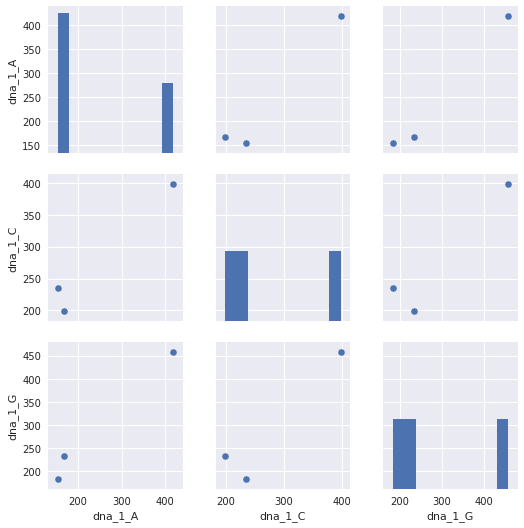

In [33]:
sns.pairplot(df_groupby_class.iloc[:,0:4])

In [34]:
hue_order = df_filt['class'].unique()
print(hue_order)

['EI' 'IE' 'N']


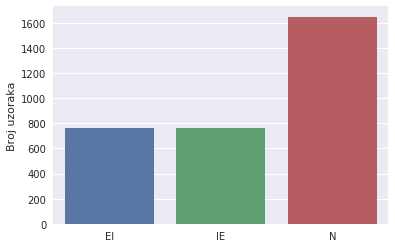

In [42]:

ax = sns.countplot(x='class', data=df_filt, order=hue_order)
ax.set(xlabel='', ylabel='Broj uzoraka')
plt.savefig("images/dataset_class_dist.png")

In [43]:

df_train, df_test = model_selection.train_test_split(df_filt, test_size=0.2, stratify=df_filt['class'], random_state=5)

df_train.to_csv("data/splice_train.csv", index=False)
df_test.to_csv("data/splice_test.csv", index=False)
df_train.head()

,class,dna_1,dna_2,dna_3,dna_4,dna_5,dna_6,dna_7,dna_8,dna_9,...,dna_51,dna_52,dna_53,dna_54,dna_55,dna_56,dna_57,dna_58,dna_59,dna_60
75,EI,G,C,T,G,A,T,A,A,A,...,A,A,A,A,A,A,G,A,G,T
3005,N,T,C,T,G,G,G,C,A,T,...,T,C,A,G,T,T,C,C,T,C
220,EI,G,C,C,G,T,G,G,T,T,...,A,A,A,G,G,C,T,C,C,T
1350,IE,G,A,G,G,G,A,A,A,G,...,G,A,A,G,C,C,C,G,G,G
2693,N,A,C,T,T,C,T,G,C,T,...,A,C,T,G,C,G,C,A,G,G


TypeError: integer argument expected, got float

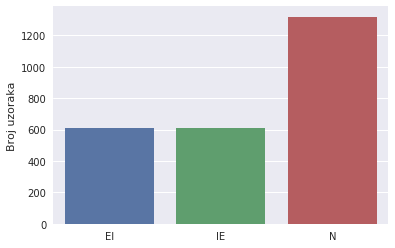

In [46]:
ax = sns.countplot(x='class', data=df_train, order = hue_order)
ax.set(xlabel='', ylabel='Broj uzoraka')
plt.savefig("images/trainset_class_dist.jpg")

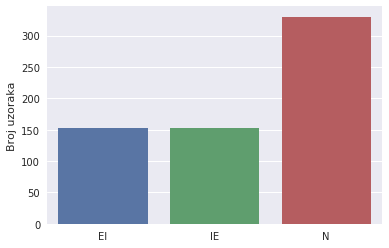

In [45]:
ax = sns.countplot(x='class', data=df_test, order=hue_order)
ax.set(xlabel='', ylabel='Broj uzoraka')
plt.savefig("images/testset_class_dist.jpg")

[Text(0,0.5,'Broj uzoraka'), Text(0.5,0,'')]

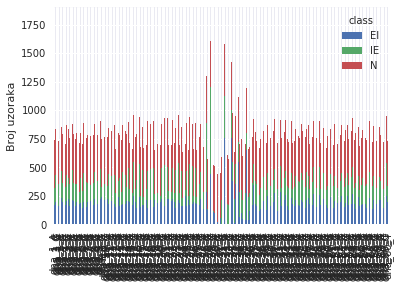

In [39]:
ax = df_groupby_class.set_index('class').T.plot(kind='bar', stacked=True)
ax.set(xlabel='', ylabel='Broj uzoraka')

In [40]:
plt.savefig("images/nucleotids_byclass.jpg")

In [2]:
jvm.start(max_heap_size="512m")

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.5/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.5/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.5/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.5/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.5/dist-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=512m
DEBUG:weka.core.jvm:Package support disabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Signalling caller


In [3]:
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])

In [4]:
from weka.core.converters import Loader, Saver
loader = Loader(classname="weka.core.converters.CSVLoader")
data_train = loader.load_file("data/splice_train.csv")
data_test = loader.load_file("data/splice_train.csv")

In [5]:
from weka.classifiers import Evaluation

data_train.class_is_first()
data_test.class_is_first()
cls.build_classifier(data_train)


In [6]:
for index, inst in enumerate(data_test):
    pred = cls.classify_instance(inst)
    dist = cls.distribution_for_instance(inst)
    print(str(index+1) + ": label index=" + str(pred) + ", class distribution=" + str(dist))
    

1: label index=0.0, class distribution=[0.98571429 0.         0.01428571]
2: label index=1.0, class distribution=[0.04237288 0.95762712 0.        ]
3: label index=0.0, class distribution=[0.98571429 0.         0.01428571]
4: label index=0.0, class distribution=[1. 0. 0.]
5: label index=2.0, class distribution=[0.         0.11403509 0.88596491]
6: label index=0.0, class distribution=[1. 0. 0.]
7: label index=1.0, class distribution=[0.06779661 0.92372881 0.00847458]
8: label index=0.0, class distribution=[1. 0. 0.]
9: label index=1.0, class distribution=[0. 1. 0.]
10: label index=0.0, class distribution=[0.98571429 0.         0.01428571]
11: label index=1.0, class distribution=[0. 1. 0.]
12: label index=0.0, class distribution=[1. 0. 0.]
13: label index=1.0, class distribution=[0.10204082 0.89795918 0.        ]
14: label index=0.0, class distribution=[1. 0. 0.]
15: label index=0.0, class distribution=[1. 0. 0.]
16: label index=1.0, class distribution=[0.04237288 0.95762712 0.        ]
1

602: label index=2.0, class distribution=[0. 0. 1.]
603: label index=1.0, class distribution=[0.10204082 0.89795918 0.        ]
604: label index=1.0, class distribution=[0.10204082 0.89795918 0.        ]
605: label index=2.0, class distribution=[0. 0. 1.]
606: label index=2.0, class distribution=[0.08163265 0.         0.91836735]
607: label index=1.0, class distribution=[0.2 0.8 0. ]
608: label index=0.0, class distribution=[0.9375 0.0625 0.    ]
609: label index=0.0, class distribution=[1. 0. 0.]
610: label index=0.0, class distribution=[1. 0. 0.]
611: label index=0.0, class distribution=[1. 0. 0.]
612: label index=1.0, class distribution=[0. 1. 0.]
613: label index=0.0, class distribution=[1. 0. 0.]
614: label index=0.0, class distribution=[0.99009901 0.00990099 0.        ]
615: label index=0.0, class distribution=[1. 0. 0.]
616: label index=0.0, class distribution=[0.76923077 0.23076923 0.        ]
617: label index=1.0, class distribution=[0. 1. 0.]
618: label index=1.0, class distr

1246: label index=1.0, class distribution=[0.2 0.8 0. ]
1247: label index=0.0, class distribution=[0.99009901 0.00990099 0.        ]
1248: label index=1.0, class distribution=[0.06779661 0.92372881 0.00847458]
1249: label index=1.0, class distribution=[0.06 0.94 0.  ]
1250: label index=0.0, class distribution=[0.99009901 0.00990099 0.        ]
1251: label index=1.0, class distribution=[0.04237288 0.95762712 0.        ]
1252: label index=2.0, class distribution=[0.05633803 0.         0.94366197]
1253: label index=0.0, class distribution=[1. 0. 0.]
1254: label index=0.0, class distribution=[0.99009901 0.00990099 0.        ]
1255: label index=0.0, class distribution=[1. 0. 0.]
1256: label index=0.0, class distribution=[1. 0. 0.]
1257: label index=2.0, class distribution=[0.         0.11403509 0.88596491]
1258: label index=0.0, class distribution=[0.99009901 0.00990099 0.        ]
1259: label index=0.0, class distribution=[1. 0. 0.]
1260: label index=1.0, class distribution=[0.04237288 0.9

1918: label index=0.0, class distribution=[1. 0. 0.]
1919: label index=1.0, class distribution=[0. 1. 0.]
1920: label index=0.0, class distribution=[1. 0. 0.]
1921: label index=1.0, class distribution=[0.10204082 0.89795918 0.        ]
1922: label index=1.0, class distribution=[0. 1. 0.]
1923: label index=2.0, class distribution=[0.05633803 0.         0.94366197]
1924: label index=1.0, class distribution=[0. 1. 0.]
1925: label index=2.0, class distribution=[0.04545455 0.13636364 0.81818182]
1926: label index=0.0, class distribution=[1. 0. 0.]
1927: label index=0.0, class distribution=[1. 0. 0.]
1928: label index=2.0, class distribution=[0.         0.11403509 0.88596491]
1929: label index=0.0, class distribution=[1. 0. 0.]
1930: label index=1.0, class distribution=[0. 1. 0.]
1931: label index=2.0, class distribution=[0.         0.11403509 0.88596491]
1932: label index=1.0, class distribution=[0. 1. 0.]
1933: label index=0.0, class distribution=[1. 0. 0.]
1934: label index=0.0, class dis

In [8]:
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.4"])
cls.build_classifier(data_train)

print(cls)

import weka.plot.graph as graph  # NB: pygraphviz and PIL are required
graph.plot_dot_graph(cls.graph)

J48 pruned tree
------------------

dna_30 = T
|   dna_35 = C: N (70.0/1.0)
|   dna_35 = T: N (94.0)
|   dna_35 = A: N (87.0)
|   dna_35 = G
|   |   dna_31 = C: N (16.0)
|   |   dna_31 = G
|   |   |   dna_32 = T: EI (49.0/4.0)
|   |   |   dna_32 = G: N (5.0)
|   |   |   dna_32 = C: N (3.0)
|   |   |   dna_32 = A: N (7.0)
|   |   dna_31 = T: N (18.0)
|   |   dna_31 = A: N (10.0)
dna_30 = G
|   dna_29 = C
|   |   dna_32 = T
|   |   |   dna_31 = C: N (4.0)
|   |   |   dna_31 = G: EI (49.0/2.0)
|   |   |   dna_31 = T: N (2.0)
|   |   |   dna_31 = A: EI (0.0)
|   |   dna_32 = G: N (10.0)
|   |   dna_32 = C: N (6.0)
|   |   dna_32 = A: N (11.0)
|   dna_29 = A
|   |   dna_32 = T
|   |   |   dna_31 = C: IE (49.0/5.0)
|   |   |   dna_31 = G
|   |   |   |   dna_35 = C
|   |   |   |   |   dna_28 = T: IE (6.0)
|   |   |   |   |   dna_28 = C
|   |   |   |   |   |   dna_33 = C: IE (10.0)
|   |   |   |   |   |   dna_33 = G
|   |   |   |   |   |   |   dna_50 = A: IE (1.0)
|   |   |   |   |   |   |   d

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'bKGD' 41 6
DEBUG:PIL.PngImagePlugin:b'bKGD' 41 6 (unknown)
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 59 8192


In [9]:
from weka.attribute_selection import ASSearch, ASEvaluation, AttributeSelection
search = ASSearch(classname="weka.attributeSelection.BestFirst", options=["-D", "1", "-N", "5"])
evaluator = ASEvaluation(classname="weka.attributeSelection.CfsSubsetEval", options=["-P", "1", "-E", "1"])
attsel = AttributeSelection()
attsel.search(search)
attsel.evaluator(evaluator)
attsel.select_attributes(data_train)

In [10]:
print("# attributes: " + str(attsel.number_attributes_selected))
print("attributes: " + str(attsel.selected_attributes))
print("result string:\n" + attsel.results_string)

# attributes: 26
attributes: [ 6  9 13 15 16 17 18 19 20 21 23 24 25 26 28 29 30 31 32 33 34 35 39 49
 55 60  0]
result string:


=== Attribute Selection on all input data ===

Search Method:
	Best first.
	Start set: no attributes
	Search direction: forward
	Stale search after 5 node expansions
	Total number of subsets evaluated: 610
	Merit of best subset found:    0.426

Attribute Subset Evaluator (supervised, Class (nominal): 1 class):
	CFS Subset Evaluator
	Including locally predictive attributes

Selected attributes: 7,10,14,16,17,18,19,20,21,22,24,25,26,27,29,30,31,32,33,34,35,36,40,50,56,61 : 26
                     dna_6
                     dna_9
                     dna_13
                     dna_15
                     dna_16
                     dna_17
                     dna_18
                     dna_19
                     dna_20
                     dna_21
                     dna_23
                     dna_24
                     dna_25
                     dna_26
 

In [11]:
data = data_train

In [12]:
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls.build_classifier(data)

for index, inst in enumerate(data):
    pred = cls.classify_instance(inst)
    dist = cls.distribution_for_instance(inst)
    print(str(index+1) + ": label index=" + str(pred) + ", class distribution=" + str(dist))

1: label index=0.0, class distribution=[0.98571429 0.         0.01428571]
2: label index=1.0, class distribution=[0.04237288 0.95762712 0.        ]
3: label index=0.0, class distribution=[0.98571429 0.         0.01428571]
4: label index=0.0, class distribution=[1. 0. 0.]
5: label index=2.0, class distribution=[0.         0.11403509 0.88596491]
6: label index=0.0, class distribution=[1. 0. 0.]
7: label index=1.0, class distribution=[0.06779661 0.92372881 0.00847458]
8: label index=0.0, class distribution=[1. 0. 0.]
9: label index=1.0, class distribution=[0. 1. 0.]
10: label index=0.0, class distribution=[0.98571429 0.         0.01428571]
11: label index=1.0, class distribution=[0. 1. 0.]
12: label index=0.0, class distribution=[1. 0. 0.]
13: label index=1.0, class distribution=[0.10204082 0.89795918 0.        ]
14: label index=0.0, class distribution=[1. 0. 0.]
15: label index=0.0, class distribution=[1. 0. 0.]
16: label index=1.0, class distribution=[0.04237288 0.95762712 0.        ]
1

649: label index=1.0, class distribution=[0. 1. 0.]
650: label index=1.0, class distribution=[0. 1. 0.]
651: label index=0.0, class distribution=[1. 0. 0.]
652: label index=0.0, class distribution=[1. 0. 0.]
653: label index=0.0, class distribution=[1. 0. 0.]
654: label index=0.0, class distribution=[1. 0. 0.]
655: label index=2.0, class distribution=[0.         0.11403509 0.88596491]
656: label index=2.0, class distribution=[0.04545455 0.13636364 0.81818182]
657: label index=2.0, class distribution=[0.08163265 0.         0.91836735]
658: label index=2.0, class distribution=[0.04081633 0.         0.95918367]
659: label index=0.0, class distribution=[0.95833333 0.04166667 0.        ]
660: label index=0.0, class distribution=[1. 0. 0.]
661: label index=1.0, class distribution=[0.13636364 0.86363636 0.        ]
662: label index=2.0, class distribution=[0.05633803 0.         0.94366197]
663: label index=0.0, class distribution=[1. 0. 0.]
664: label index=0.0, class distribution=[0.97368421

1267: label index=0.0, class distribution=[1. 0. 0.]
1268: label index=0.0, class distribution=[1. 0. 0.]
1269: label index=0.0, class distribution=[0.94736842 0.         0.05263158]
1270: label index=0.0, class distribution=[1. 0. 0.]
1271: label index=0.0, class distribution=[0.97368421 0.01315789 0.01315789]
1272: label index=0.0, class distribution=[1. 0. 0.]
1273: label index=0.0, class distribution=[1. 0. 0.]
1274: label index=2.0, class distribution=[0.         0.11403509 0.88596491]
1275: label index=0.0, class distribution=[0.97368421 0.01315789 0.01315789]
1276: label index=2.0, class distribution=[0. 0. 1.]
1277: label index=0.0, class distribution=[1. 0. 0.]
1278: label index=1.0, class distribution=[0. 1. 0.]
1279: label index=1.0, class distribution=[0.  0.8 0.2]
1280: label index=2.0, class distribution=[0.08163265 0.         0.91836735]
1281: label index=1.0, class distribution=[0. 1. 0.]
1282: label index=0.0, class distribution=[0.99009901 0.00990099 0.        ]
1283:

1932: label index=1.0, class distribution=[0. 1. 0.]
1933: label index=0.0, class distribution=[1. 0. 0.]
1934: label index=0.0, class distribution=[0.9375 0.0625 0.    ]
1935: label index=1.0, class distribution=[0.10204082 0.89795918 0.        ]
1936: label index=1.0, class distribution=[0. 1. 0.]
1937: label index=1.0, class distribution=[0.06779661 0.92372881 0.00847458]
1938: label index=0.0, class distribution=[0.98571429 0.         0.01428571]
1939: label index=2.0, class distribution=[0.         0.11403509 0.88596491]
1940: label index=0.0, class distribution=[1. 0. 0.]
1941: label index=1.0, class distribution=[0.06779661 0.92372881 0.00847458]
1942: label index=2.0, class distribution=[0. 0. 1.]
1943: label index=0.0, class distribution=[1. 0. 0.]
1944: label index=0.0, class distribution=[1. 0. 0.]
1945: label index=1.0, class distribution=[0. 1. 0.]
1946: label index=2.0, class distribution=[0.         0.11403509 0.88596491]
1947: label index=1.0, class distribution=[0.0677

In [15]:
from weka.filters import Filter
remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", "1-3"])
data.class_is_first()
from weka.classifiers import FilteredClassifier
fc = FilteredClassifier()
fc.filter = remove
fc.classifier = cls
from weka.classifiers import Evaluation
from weka.core.classes import Random
evl = Evaluation(data)
evl.crossvalidate_model(fc, data, 10, Random(1))

print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())

import weka.plot.classifiers as plcls  # NB: matplotlib is required
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

JavaException: Class index is negative (not set)!